### Comparing edge-based and region-based segmentation
[link to example](https://scikit-image.org/docs/stable/auto_examples/applications/plot_coins_segmentation.html#sphx-glr-auto-examples-applications-plot-coins-segmentation-py)

In this example, we will see how to segment objects from a background. We use the `coins` image which shows several coins outlined against a darker background.

In this example, we will see how to segment objects from a background. We use the `coins` image which shows several coins outlined against a darker background.

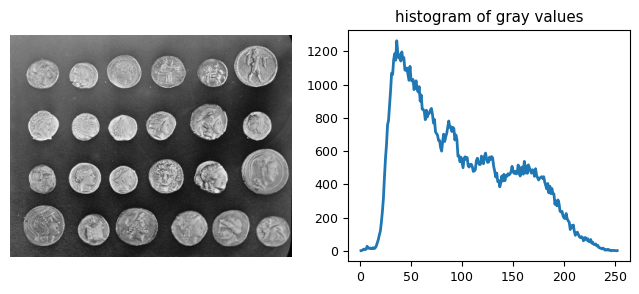

In [ ]:
import numpy as np
import skimage

coins = skimage.data.coins()
hist, hist_centers = skimage.exposure.histogram(coins)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(coins, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
_ = axes[1].set_title('histogram of gray values')

#### Thresholding
A simple way to segment the coins is to choose a threshold based on the histogram of gray values.
Unfortunately, thresholding this image gives a binary image thateither misses significant parts of the coins or merges parts of the background with the coins:

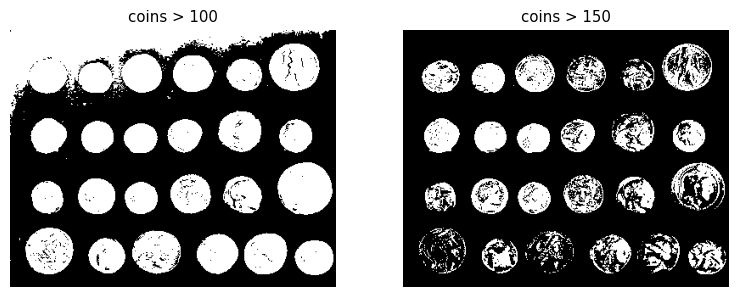

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(coins > 100, cmap=plt.cm.gray)
axes[0].set_title('coins > 100')

axes[1].imshow(coins > 150, cmap=plt.cm.gray)
axes[1].set_title('coins > 150')

for a in axes:
    a.axis('off')

plt.tight_layout()

#### Edge-based segmentation
Next, we try to delineate the contours of the coins using edge-based segmentation. To do this, we first get the edges of features using the Canny edge-detector.

(-0.5, 383.5, 302.5, -0.5)

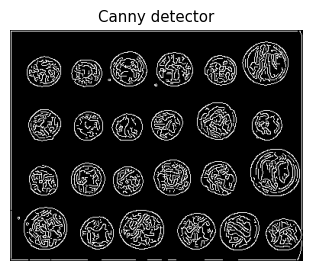

In [ ]:
edges = skimage.feature.canny(coins)

fig, ax = plt.subplots(figsize=(4,3))
ax.imshow(edges, cmap=plt.cm.gray)
ax.set_title('Canny detector')
ax.axis('off')

These contours can be filled using mathematical morphology.

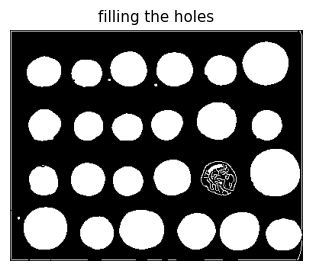

In [ ]:
from scipy import ndimage

fill_coins = ndimage.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(fill_coins, cmap=plt.cm.gray)
_ = ax.set_title('filling the holes')
_ = ax.axis('off')

Small spurious objects are easily removed by setting a minimum size for valid objects.

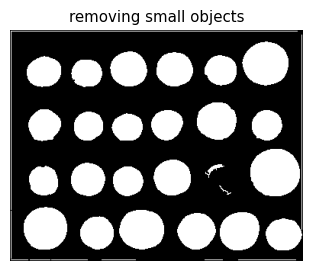

In [ ]:
coins_cleaned = skimage.morphology.remove_small_objects(fill_coins, 21)

fig, ax = plt.subplots(figsize=(4,3))
ax.imshow(coins_cleaned, cmap=plt.cm.gray)
_ = ax.set_title('removing small objects')
_ = ax.axis('off')

However this method is not very robust, since contours that are not perfectly closed are not filled correctly, as is the case for one unfilled coin above.

#### Region-based segmantation
We therfore try a region-based method using the watershed transform. First, we find an elevation map using the Sobel gradient of the image.

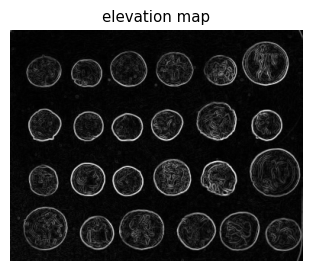

In [ ]:
elevation_map = skimage.filters.sobel(coins)

fig, ax = plt.subplots(figsize=(4,3))
ax.imshow(elevation_map, cmap=plt.cm.gray)
_= ax.set_title('elevation map')
_ =ax.axis('off')

Next we find markers of the background and the coins based on the extreme parts of the histogram of gray values.

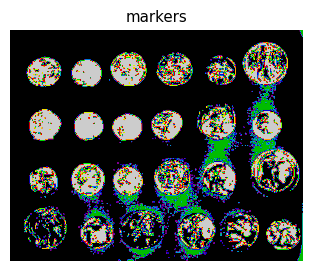

In [ ]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral)
_ = ax.set_title('markers')
_ = ax.axis('off')

Finally, we use the watershed transform to fill regions of the elevation map starting from the markers determined above:

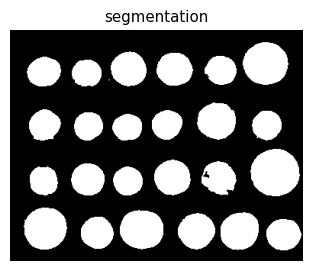

In [ ]:
segmentation_coins = skimage.segmentation.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation_coins, cmap=plt.cm.gray)
_ = ax.set_title('segmentation')
_ = ax.axis('off')

The last method works even better, and the coins can be segmented and labeled individually.

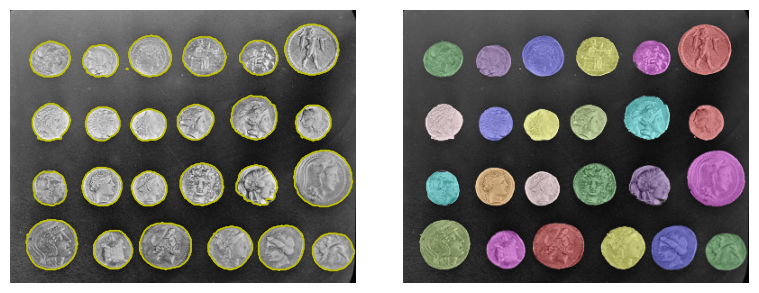

In [ ]:
segmentation_coins = ndimage.binary_fill_holes(segmentation_coins - 1)
labeled_coins, _ = ndimage.label(segmentation_coins)
image_label_overlay = skimage.color.label2rgb(labeled_coins, image=coins, bg_label=0)

fig, axes = plt.subplots(1, 2, figsize=(8,3), sharey=True)
axes[0].imshow(coins, cmap=plt.cm.gray)
axes[0].contour(segmentation_coins, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay)

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()